23 - Histogram based image segmentation in Python
1.  seg by hist
2.  flat and show
3.  color
4.  clean

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
path = r'/content/gdrive/My Drive/Colab Notebooks/screeni_practice'
os.chdir( path )

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, img_as_float, img_as_ubyte
from skimage.restoration import denoise_nl_means, estimate_sigma

import scipy.ndimage as nd

<ipython-input-21-4c75b4298636>:3: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(img, multichannel=False))
<ipython-input-21-4c75b4298636>:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise = denoise_nl_means(img, h=1.15*sigma_est, fast_mode=True, patch_size=5, patch_distance=3, multichannel=False)


(array([0.0000e+00, 0.0000e+00, 1.0000e+00, 6.0000e+00, 9.0000e+00,
        1.2100e+02, 4.9600e+02, 1.8720e+03, 1.4420e+03, 1.6740e+03,
        1.6270e+03, 1.7320e+03, 6.8140e+03, 1.1199e+04, 3.0491e+04,
        2.7028e+04, 3.6967e+04, 1.6567e+04, 1.4323e+04, 5.1460e+03,
        4.9270e+03, 4.6010e+03, 3.8410e+03, 8.4710e+03, 7.7810e+03,
        1.3974e+04, 9.7590e+03, 1.3793e+04, 8.2170e+03, 9.5450e+03,
        6.4040e+03, 2.7600e+03, 2.7180e+03, 1.2830e+03, 1.5420e+03,
        8.7600e+02, 1.2530e+03, 9.0800e+02, 1.6240e+03, 1.2350e+03,
        2.3560e+03, 2.9380e+03, 2.1150e+03, 3.0240e+03, 1.7490e+03,
        2.2100e+03, 1.2600e+03, 1.7890e+03, 1.2740e+03, 2.0550e+03,
        2.2850e+03, 1.6680e+03, 2.9090e+03, 2.4750e+03, 5.4560e+03,
        6.3700e+03, 1.8138e+04, 2.1101e+04, 4.7101e+04, 3.9380e+04,
        6.1025e+04, 5.0356e+04, 2.3132e+04, 2.0545e+04, 7.5710e+03,
        5.7210e+03, 2.0930e+03, 1.9100e+03, 7.8500e+02, 8.5900e+02,
        6.2400e+02, 3.0500e+02, 3.4200e+02, 1.78

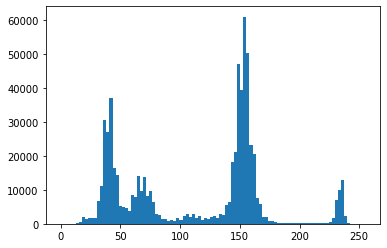

In [ ]:
img = img_as_float(io.imread('images/BSE_Google_noisy.jpg'))

sigma_est = np.mean(estimate_sigma(img, multichannel=False))
denoise = denoise_nl_means(img, h=1.15*sigma_est, fast_mode=True, patch_size=5, patch_distance=3, multichannel=False)

denoise_ubyte = img_as_ubyte(denoise)
# plt.imshow(denoise, cmap='gray')
plt.hist(denoise_ubyte.flat, bins=100, range=(0,255))

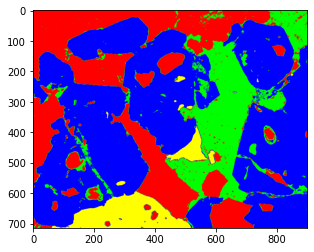

In [ ]:
segm1 = (denoise_ubyte <= 55)
segm2 = (denoise_ubyte > 55) & (denoise_ubyte <= 110)
segm3 = (denoise_ubyte > 110) & (denoise_ubyte <= 210)
segm4 = (denoise_ubyte > 210)

all_segments = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1], 3))

all_segments[segm1] = (1,0,0)
all_segments[segm2] = (0,1,0)
all_segments[segm3] = (0,0,1)
all_segments[segm4] = (1,1,0)
plt.imshow(all_segments)

In [ ]:
seglist = [segm1, segm2, segm3, segm4]
for i in seglist:
  seg_opened = nd.binary_opening(i, np.ones((3,3)))
  closed_name = f'{i}_closed'
  closed_name = nd.binary_closing(seg_opened, np.ones((3,3)))

all_segments_cleaned = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1], 3))

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)
all_segments_cleaned[segm3_closed] = (0,0,1)
all_segments_cleaned[segm4_closed] = (1,1,0)

plt.imshow(all_segments_cleaned)

NameError: ignored

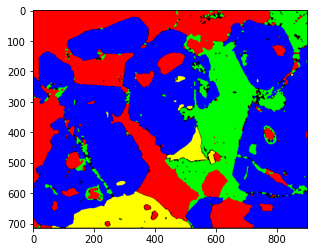

In [ ]:
# fix by chatGBT

seglist = [segm1, segm2, segm3, segm4]

# create empty arrays to store the closed segments
seg_closed_list = []

# apply binary opening and closing to each segment in the list
for i in seglist:
  seg_opened = nd.binary_opening(i, np.ones((3,3)))
  seg_closed = nd.binary_closing(seg_opened, np.ones((3,3)))
  seg_closed_list.append(seg_closed)

# create an array to store the cleaned segments
all_segments_cleaned = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1], 3))

# assign colors to each segment and add it to the cleaned segments array
all_segments_cleaned[seg_closed_list[0]] = (1,0,0) # red
all_segments_cleaned[seg_closed_list[1]] = (0,1,0) # green
all_segments_cleaned[seg_closed_list[2]] = (0,0,1) # blue
all_segments_cleaned[seg_closed_list[3]] = (1,1,0) # yellow

# display the cleaned segments
plt.imshow(all_segments_cleaned)
plt.imsave('images/segmented.jpg', all_segments_cleaned)